In [1]:
import os
import numpy as np
import pandas as pd

from tensorflow import keras

In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 7769716517457790672,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 10692640128
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 15070209835085075388
 physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1"]

```
model = ...
model = keras.utils.multi_gpu_model(model, gpus=4)
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.RMSprop(lr=1e-4), metrics=['acc'])
...
```

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255
train_scaled, val_scaled, train_target, val_target = train_test_split(\
    train_scaled, train_target, random_state = 42, test_size = 0.2)

# 손실곡선

In [5]:
def model_fn(a_layer = None):
    model = keras.Sequential()
    
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    
    if a_layer:
        model.add(a_layer)
        
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [6]:
model = model_fn()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [10]:
history = model.fit(train_scaled, train_target, epochs = 5, verbose = 0)

In [13]:
from pprint import pprint

In [14]:
# 에포크마다 손실값을 계산 
# metrics 매개변수에 accuracy 를 추가해서 history 에 추가됨
pprint(history.history)

{'accuracy': [0.8160625100135803,
              0.8594791889190674,
              0.8732708096504211,
              0.8792916536331177,
              0.8853333592414856],
 'loss': [0.521857738494873,
          0.3910347521305084,
          0.35585737228393555,
          0.3351161479949951,
          0.32072970271110535]}


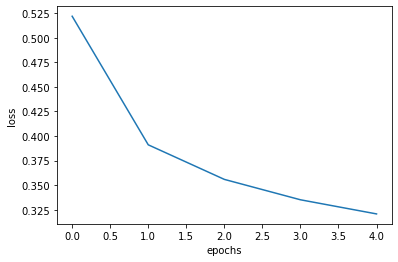

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

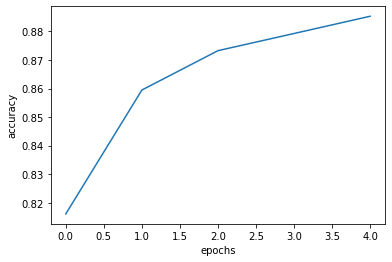

In [16]:
plt.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

### epochs > 20 

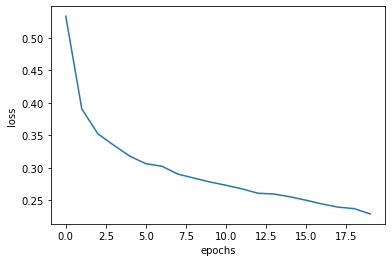

In [18]:
model = model_fn()
model.compile(loss = 'sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

# 검증 손실

In [19]:
model = model_fn()
model.compile(loss = 'sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,\
                   validation_data =(val_scaled, val_target))

In [23]:
pprint(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


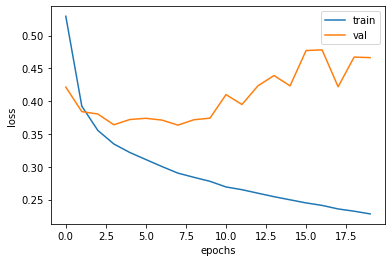

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [24]:
model = model_fn()
# model.compile(loss = 'sparse_categorical_crossentropy', metrics='accuracy')
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,\
                   validation_data =(val_scaled, val_target))

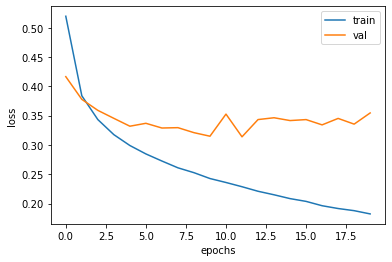

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# DropOut
과대적합 방지 > 일부 뉴런이 랜덤하게 꺼지면, 특정 뉴런에 과대하게 의존하는 것을 줄일 수 있고 모든 입력에 대해 주의를 기울여야 한다.   
일부 뉴런의 출력이 없을 수 있다는 것을 감안하면 안정적 예측이 가능하다.


In [26]:
# 훈련 후 평가나 예측에는 적용하지 말아야 함
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               78500     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

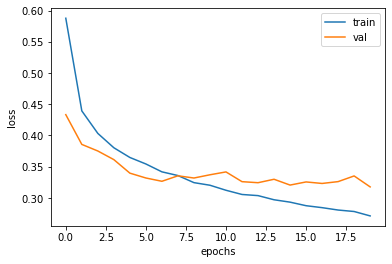

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 모델 저장과 복원

In [31]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=10, verbose=0, validation_data=(val_scaled, val_target))

In [32]:
pprint(history.history)

{'accuracy': [0.7946666479110718,
              0.8416666388511658,
              0.851895809173584,
              0.8626041412353516,
              0.8657083511352539,
              0.8696249723434448,
              0.8723750114440918,
              0.8762500286102295,
              0.878000020980835,
              0.8791249990463257],
 'loss': [0.5866652131080627,
          0.4392630159854889,
          0.40638864040374756,
          0.3818528652191162,
          0.3678836226463318,
          0.3566945493221283,
          0.34636664390563965,
          0.3357544243335724,
          0.32823511958122253,
          0.32005834579467773],
 'val_accuracy': [0.8309166431427002,
                  0.8554999828338623,
                  0.8650833368301392,
                  0.8633333444595337,
                  0.874916672706604,
                  0.8787500262260437,
                  0.8775833249092102,
                  0.8773333430290222,
                  0.8776666522026062,
               

In [33]:
# 훈련 모델 파라미터 저장
model.save_weights('model_weights.h5')

In [34]:
# 모델 구조와 파라미터 함께 저장
model.save('model-whole.h5')

In [35]:
!ls -al *.h5

-rw-rw-r-- 1 eunbinpark eunbinpark 332480  3월 10 22:41 model_weights.h5
-rw-rw-r-- 1 eunbinpark eunbinpark 981776  3월 10 22:42 model-whole.h5


## 1. 미훈련 신규 모델 + 저장된 파라미터 파일

In [37]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model_weights.h5')
# load_weights는 save_weights 메서드로 저장했던 모델과 정확히 같은 구조여야만 한다

In [39]:
val_labels = np.argmax(model.predict(val_scaled), axis=-1)

In [41]:
np.unique(val_labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([1344, 1215, 1284, 1241, 1207, 1230,  963, 1076, 1167, 1273]))

In [42]:
np.mean(val_labels == val_target)

0.87775

# 2. ahepf wjsc

In [ ]:
mode 